# Figure 5.

Atmospheric circulation regimes of (crosses) Trappist-1e and (circles) Proxima b simulations with (blue) *MassFlux*, (orange) *Adjust*, and
(green) *NoCnvPm* set-up, defined by the estimates of the non-dimensional Rossby deformation radius ($L_d/R_p$, x-axis) and the non-dimensional Rhines length ($L_{R}/R_p$, y-axis).

[Skip code and jump to the figure](#Show-the-figure)

----------------------------------

Import the necessary libraries.

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

In [3]:
from aeolus.calc import last_year_mean
from aeolus.core import Run
from aeolus.subset import l_range_constr

In [4]:
from commons import (
    GLM_MODEL_TIMESTEP,
    PLANET_ALIASES,
    RUN_ALIASES,
    output_name_prefix,
)
from global_run_diags import (
    calc_derived_cubes,
    nondim_rhines_number,
    nondim_rossby_deformation_radius,
)
import mypaths

Global stylesheet for figures.

In [5]:
plt.style.use("paper.mplstyle")

## Load data

Create a dictionary of `Run` objects with preprocessed data.

In [6]:
runs = {}
for planet in PLANET_ALIASES.keys():
    for run_key in RUN_ALIASES.keys():
        label = f"{planet}_{run_key}"
        
        fname = mypaths.sadir / label / "_processed" / f"{label}.nc"
        
        runs[label] = Run(
            files=fname, name=label, planet=planet, timestep=GLM_MODEL_TIMESTEP
        )
        
        # Calculate additional diagnostics
        runs[label].add_data(calc_derived_cubes)

## Calculate the non-dimensional numbers

Define a level height constraint to select data between 0 and 15 km.

In [7]:
HGT_0 = 0
HGT_1 = 15
hgt_cnstr = l_range_constr(HGT_0, HGT_1)

Loop over planets and runs again to populate dictionaries of Rhines and Rossby number estimates.

In [8]:
rhines = {}
rossby = {}
for planet in PLANET_ALIASES.keys():
    for run_key in RUN_ALIASES.keys():
        label = f"{planet}_{run_key}"
        rhines[label] = last_year_mean(
            nondim_rhines_number(runs[label].proc.extract(hgt_cnstr))
        )
        rossby[label] = last_year_mean(
            nondim_rossby_deformation_radius(runs[label].proc.extract(hgt_cnstr))
        )

## Plot the results

Dictionaries of marker styles

In [9]:
marker_kws = dict(
    trap1e=dict(marker="X"),
    proxb=dict(marker="o"),
    grcs=dict(color="C0"),
    llcs_all_rain=dict(color="C1"),
    acoff=dict(color="C2"),
)
common_plt_kw = dict(linestyle="", ms=15)

In [10]:
# Axes limits
xlim = [0.5, 1.5]
ylim = [0.5, 1.5]

fig, ax = plt.subplots()

for run_key in RUN_ALIASES.keys():
    for planet in PLANET_ALIASES.keys():
        _plt_kw = {**marker_kws[run_key], **marker_kws[planet]}
        label = f"{planet}_{run_key}"

        ax.plot(rossby[label].data, rhines[label].data, **_plt_kw, **common_plt_kw)

# Create two legends, for planets and runs, respectively
dummy_lines = [
    Line2D([0], [0], color="k", **common_plt_kw, **marker_kws[i])
    for i in PLANET_ALIASES.keys()
]
leg1 = ax.legend(dummy_lines, PLANET_ALIASES.values(), loc=3, title="Planets")

dummy_lines = [
    Line2D([0], [0], marker=".", **common_plt_kw, **marker_kws[i])
    for i in RUN_ALIASES.keys()
]
leg2 = ax.legend(dummy_lines, RUN_ALIASES.values(), loc=2, title="Runs")
ax.add_artist(leg1)

# Vertical and horizontal guides
ax.hlines(1.0, *xlim, linestyle="--", linewidth=0.75)
ax.vlines(1.0, *ylim, linestyle="--", linewidth=0.75)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Axes labels
ax.set_xlabel("Non-dimensional Rossby deformation radius")
ax.set_ylabel("Non-dimensional Rhines length")

# Annotations
ax.text(1.05, 0.55, "Rhines rotators", color="grey", fontsize=18)
ax.text(1.05, 1.45, "Slow rotators", color="grey", fontsize=18)
ax.text(0.75, 0.55, "Rapid rotators", color="grey", fontsize=18)

plt.close()  # Show the figure in a separate cell

## Show the figure

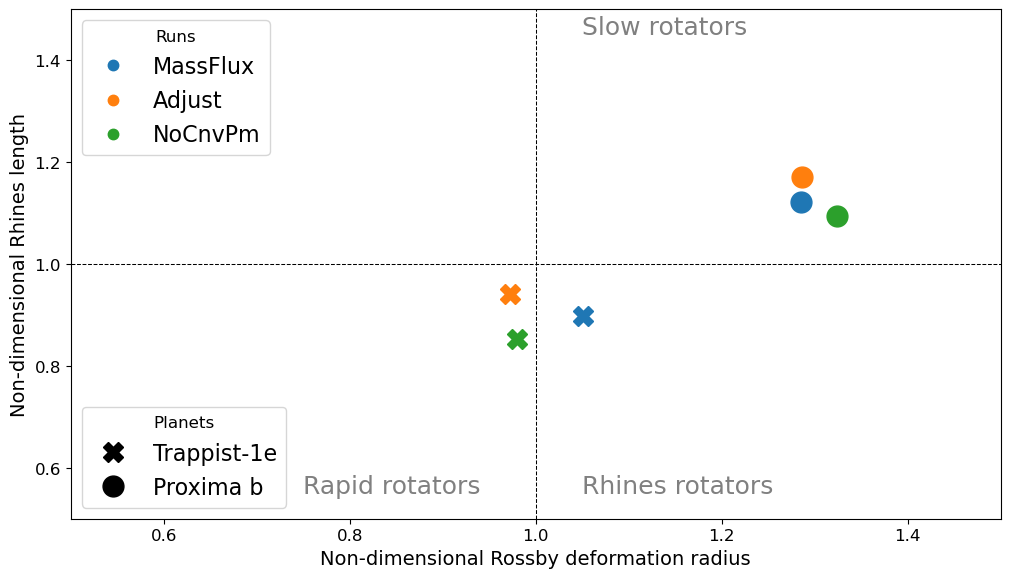

In [11]:
fig

And save it.

In [12]:
imgname = mypaths.plotdir / f"{output_name_prefix}__nondim_rossby_rhines__hgt{HGT_0}-{HGT_1}km.png"

In [13]:
fig.savefig(imgname, dpi=200)
print(f"Saved to ../{imgname.relative_to(mypaths.topdir)}")

Saved to ../plots/trap1e_proxb__grcs_llcs_all_rain_acoff__nondim_rossby_rhines__hgt0-15km.png
